In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import dft

Для 2ого варианта N = 9, L = 3, nu_0 = -0.1

1.1 Прямоугольный импульс в дискретной форме.

In [42]:
w = np.ones(9)
w

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

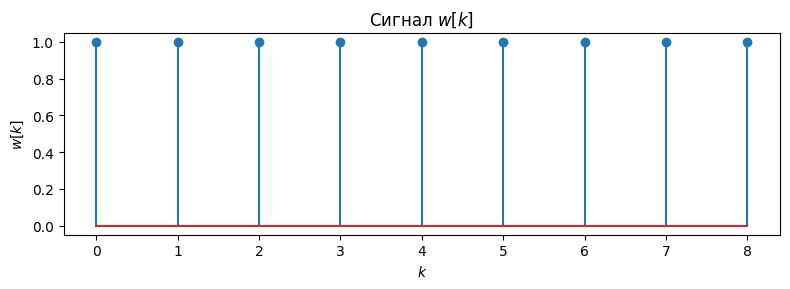

In [43]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

ДВПФ модуль

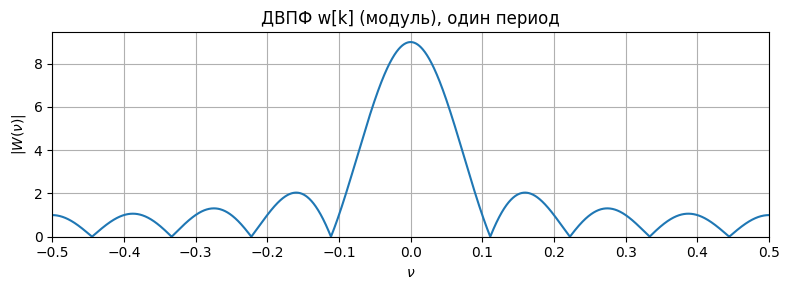

In [44]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

nu, W = dtft(w, M=2048)

plt.figure(figsize=[8, 3])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

По итогам построения графиков, запишем характерные величины:

X(0) = 9

d(ν) = 0,22 - ширина главного лепестка на нулевом уровне

точки скачков фазы на π : ± 0.1



ДВПФ фаза

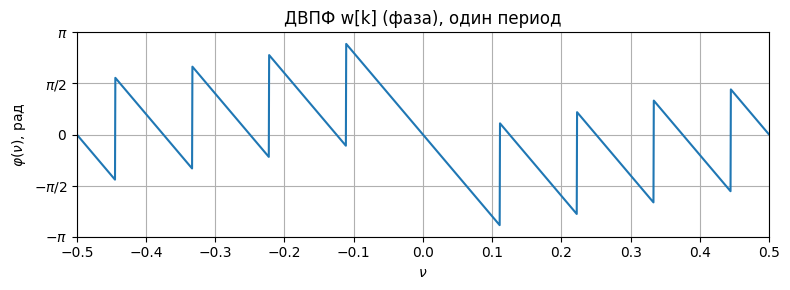

In [45]:
plt.figure(figsize=[8, 3])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

2.2 {7;3;2;-4;6;0;-4;1} m = 4

a) матричная форма ДПФ

In [46]:
N=8
k=np.arange(N)
x = np.array([7, 3, 2 , -4, 6, 0, -4, 1])
W8 = dft(N)
Xn = W8 @ x
Xn

array([11.        +0.00000000e+00j,  6.65685425-4.58578644e+00j,
       15.        -6.00000000e+00j, -4.65685425+7.41421356e+00j,
       11.        +7.34788079e-16j, -4.65685425-7.41421356e+00j,
       15.        +6.00000000e+00j,  6.65685425+4.58578644e+00j])

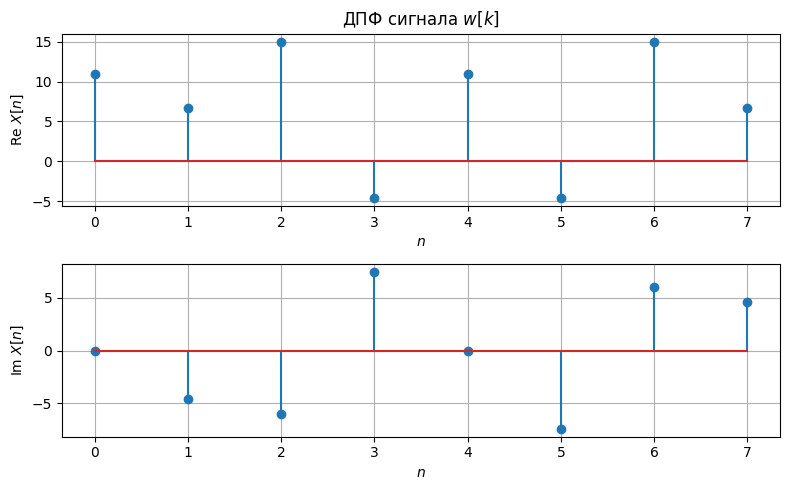

In [47]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

б) Через быстрое преобразование Фурье (БПФ)

In [48]:
Xn1=np.fft.fft(x)
Xn1

array([11.        +0.j        ,  6.65685425-4.58578644j,
       15.        -6.j        , -4.65685425+7.41421356j,
       11.        +0.j        , -4.65685425-7.41421356j,
       15.        +6.j        ,  6.65685425+4.58578644j])

Сравнение результатов. Как видим, отличие мало на фоне расчётных данных

In [49]:
max(abs(Xn1-Xn))

1.1546319456101628e-14

3.1 Интерполяция ДВПФ добавлением нулевых отсчетов

2 вариант $m_0$ = 2, $m_1$ = 0,2

In [50]:
N=32
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*2*k/N) + np.sin(2*np.pi*2.25*k/N)

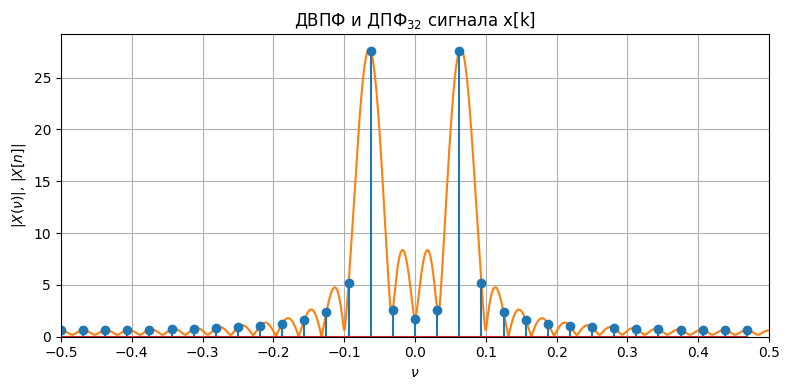

In [51]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Чтобы улучшить попадание относительной частоты на бины ДПФ (для более наглядной демонстрации максимумов), добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции np.fft.fft(x, M) равный новому числу отсчетов.

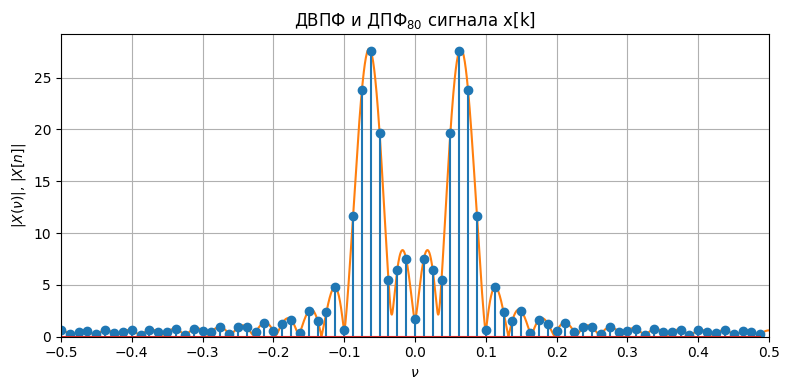

In [52]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()